In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cern-electron-collision-data/dielectron.csv


In [2]:
df = pd.read_csv('/kaggle/input/cern-electron-collision-data/dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [3]:
df.shape

(100000, 19)

In [4]:
df['Run'].unique()

array([147115, 146644, 149181, 147114, 149011, 148031, 147754, 147929,
       148029, 147926, 146944, 149182, 146511])

In [5]:
df['Run'].value_counts()

149181    18109
146644    12629
149011     9259
148031     8195
147926     7559
147929     6893
147754     6838
148029     6763
147114     6150
147115     5844
146944     5824
146511     3016
149182     2921
Name: Run, dtype: int64

In [6]:
len(df['Event'].unique())

99976

In [7]:
df['Event'].isna().sum()

0

In [8]:
df = df.drop_duplicates(keep='first')
df.shape

(99977, 19)

In [9]:
vc_e = pd.DataFrame(data=(df['Event'].value_counts()),columns=['Event','count'])
vc_e.head()

,Event,count
418006834,2,NaN
366639895,1,NaN
365659086,1,NaN
367343143,1,NaN
367699102,1,NaN


In [10]:
vc_e['count'] = vc_e['Event']
vc_e['Event'] = vc_e.index
vc_e = vc_e.reset_index(drop=True)
vc_e.head()

,Event,count
0,418006834,2
1,366639895,1
2,365659086,1
3,367343143,1
4,367699102,1


In [11]:
vc_e = vc_e.loc[vc_e['count']>1]
vc_e.shape

(1, 2)

In [12]:
vc_e

,Event,count
0,418006834,2


In [13]:
df.loc[df['Event'] == 418006834]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
39064,147114,418006834,18.7789,5.74359,7.40263,-16.27450,9.36951,-1.319410,0.910934,1,61.61360,23.14570,5.76582,-56.80910,23.8530,-1.602350,0.244141,1,10.66540
79612,148029,418006834,21.8398,-19.43140,-9.03848,-4.20742,21.43070,-0.195087,-2.706210,-1,7.19454,-6.13848,-1.89557,-3.23839,6.4245,-0.484849,-2.842080,1,3.76546


In [14]:
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [15]:
df.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,99977.000000,9.997700e+04,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99977.000000,99892.000000
mean,147935.444972,4.957273e+08,36.436050,0.136422,0.182525,-1.511318,14.411852,-0.064172,0.021571,-0.005451,44.005046,-0.003445,0.124291,-1.588849,13.802947,-0.072845,0.021280,-0.004251,30.020882
std,920.332410,4.038148e+08,41.214202,13.404566,13.470672,51.601666,12.389097,1.462154,1.799564,0.999990,46.752755,13.127970,13.169872,61.432520,12.461194,1.738055,1.816935,0.999996,25.255932
min,146511.000000,6.414000e+03,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.000000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,147114.000000,2.023271e+08,8.457250,-5.233210,-5.277350,-15.861800,3.770630,-1.283920,-1.527180,-1.000000,11.057200,-4.794580,-4.607830,-22.036900,3.738800,-1.892320,-1.556920,-1.000000,12.445850
50%,147929.000000,3.902231e+08,21.717100,0.141213,0.098888,-0.313493,12.967500,-0.061290,0.034367,-1.000000,25.265200,-0.034957,0.083522,-0.690668,11.692800,-0.136034,0.026967,-1.000000,21.284100
75%,149011.000000,6.340532e+08,50.018100,5.714980,5.648000,13.209800,20.019000,1.144400,1.562340,1.000000,66.926800,4.820140,5.062070,19.008400,19.597500,1.768260,1.596570,1.000000,39.028550
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.000000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99977 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     99977 non-null  int64  
 1   Event   99977 non-null  int64  
 2   E1      99977 non-null  float64
 3   px1     99977 non-null  float64
 4   py1     99977 non-null  float64
 5   pz1     99977 non-null  float64
 6   pt1     99977 non-null  float64
 7   eta1    99977 non-null  float64
 8   phi1    99977 non-null  float64
 9   Q1      99977 non-null  int64  
 10  E2      99977 non-null  float64
 11  px2     99977 non-null  float64
 12  py2     99977 non-null  float64
 13  pz2     99977 non-null  float64
 14  pt2     99977 non-null  float64
 15  eta2    99977 non-null  float64
 16  phi2    99977 non-null  float64
 17  Q2      99977 non-null  int64  
 18  M       99892 non-null  float64
dtypes: float64(15), int64(4)
memory usage: 15.3 MB


In [17]:
df['Q1'].unique()

array([ 1, -1])

In [18]:
df['Q2'].unique()

array([-1,  1])

In [19]:
df.isna().sum()

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64

In [20]:
df[df.isna().any(axis=1)]

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
2354,147115,626787667,2.552450,0.783675,-2.42902,-0.026877,2.552310,-0.010530,-1.25871,1,14.27670,4.387350,-13.58510,-0.142737,14.27600,-0.009998,-1.258420,-1,NaN
4428,147115,222901013,2.537850,-1.024290,-1.94845,-1.262950,2.201280,-0.546171,-2.05479,1,22.00250,-8.881480,-16.89470,-10.945300,19.08690,-0.545920,-2.054790,-1,NaN
5035,147115,251148678,2.914610,1.578570,2.33753,0.734179,2.820620,0.257437,0.97683,-1,16.58530,8.977390,13.30470,4.178960,16.05020,0.257513,0.977215,1,NaN
6066,146644,908463569,19.896200,-11.256100,12.47620,-10.653800,16.803400,-0.597779,2.30483,-1,2.41704,-1.366660,1.51671,-1.293790,2.04161,-0.597517,2.304200,1,NaN
6667,146644,588243059,3.610600,-1.635780,-2.64885,-1.828730,3.113230,-0.557996,-2.12402,1,26.11550,-11.836800,-19.16480,-13.214400,22.52550,-0.557335,-2.124080,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95396,149182,227768088,0.994475,0.358496,-0.56898,-0.732614,0.672501,-0.943190,-1.00856,1,37.43420,13.518500,-21.38920,-27.587500,25.30310,-0.943794,-1.007160,-1,NaN
96087,149182,233450553,4.573870,-3.415140,2.97767,0.624910,4.530980,0.137486,2.42452,1,18.09420,-13.515300,11.77250,2.478260,17.92370,0.137831,2.425000,-1,NaN
96394,149182,99636450,12.192400,0.074398,-11.73300,3.314690,11.733200,0.278877,-1.56446,-1,6.01043,0.038936,-5.78425,1.632860,5.78438,0.278666,-1.564060,1,NaN
97996,146511,240272111,5.165580,-4.391900,-1.96237,1.882430,4.810370,0.381970,-2.72139,-1,13.72540,-11.669700,-5.21431,5.001750,12.78160,0.381967,-2.721380,1,NaN


In [21]:
df = df.dropna()
df = df.reset_index(drop=True)

In [22]:
df.shape

(99892, 19)

In [23]:
num = df.drop(columns=['Q1','Q2'],axis=1)
cat = df[['Q1','Q2','M']]

In [24]:
num.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,E2,px2,py2,pz2,pt2,eta2,phi2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,2.74718


In [25]:
cat.head()

,Q1,Q2,M
0,1,-1,8.94841
1,-1,1,15.89300
2,1,1,38.38770
3,1,-1,3.72862
4,-1,-1,2.74718


In [26]:
from sklearn.feature_selection import f_classif

x_cat = cat[['Q1','Q2']]
y_cat = cat['M']

f_score_cat = f_classif(x_cat,y_cat)

f_score_cat

(array([0.97652564, 0.99745119]), array([0.90871768, 0.55858979]))

### Since p-values of Q1 and Q2 against M are not < 0.05, they are statistically insignificant

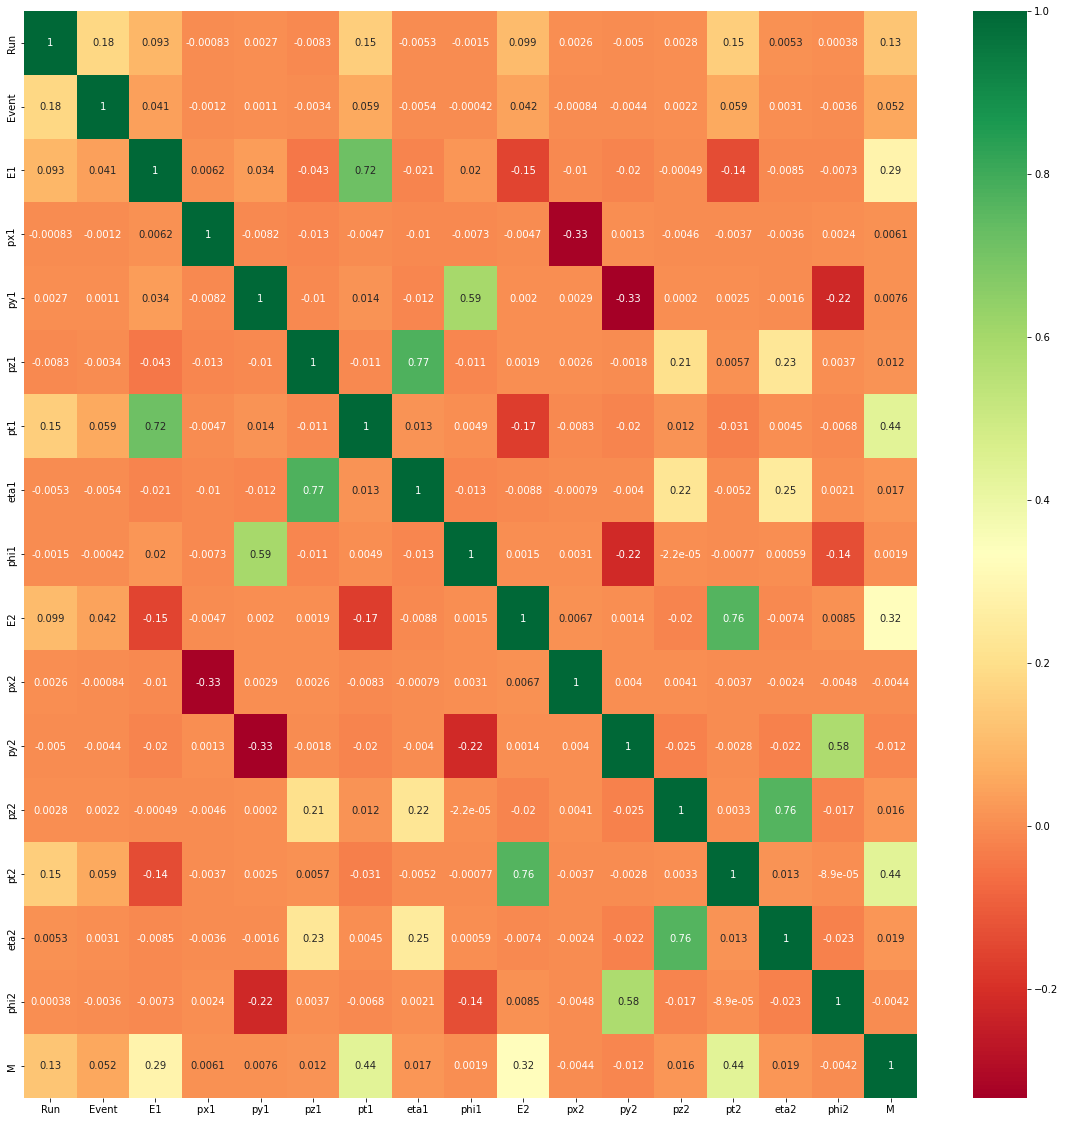

In [27]:
# for numerical input and output

from matplotlib import pyplot as plt
import seaborn as sns

corrmat = num.corr()
corr_features = corrmat.index
plt.figure(figsize=(20,20))

g = sns.heatmap(num[corr_features].corr(), annot=True, cmap='RdYlGn')


In [28]:
co_n = []
for i in (num.drop(columns=['M'],axis=1).columns):
    co_n.append(num['M'].corr(num[i]))
    
co_n

[0.12952868579826377,
 0.05237825926303478,
 0.285270075746737,
 0.0061189139071308905,
 0.007632710004141188,
 0.011695447089583238,
 0.4372083737626393,
 0.017178107260687633,
 0.0019403497369464098,
 0.32469058527865474,
 -0.00440833056470835,
 -0.011740157665351183,
 0.01569032707874001,
 0.4371915039170765,
 0.018755964666175087,
 -0.0041539270181930885]

In [29]:
cor_n = pd.DataFrame(columns=['col','corr'])
cor_n['col'] = num.drop(columns=['M'],axis=1).columns
cor_n['corr'] = co_n

cor_n

,col,corr
0,Run,0.129529
1,Event,0.052378
2,E1,0.285270
3,px1,0.006119
4,py1,0.007633
5,pz1,0.011695
6,pt1,0.437208
7,eta1,0.017178
8,phi1,0.001940
9,E2,0.324691


In [30]:
cor_n = cor_n.loc[(cor_n['corr'] >= 0.2) | (cor_n['corr'] <= -0.2)]
cor_n

,col,corr
2,E1,0.285270
6,pt1,0.437208
9,E2,0.324691
13,pt2,0.437192


In [31]:
sel_col = cor_n['col']
num_cor = num[sel_col]
num_cor.head()

,E1,pt1,E2,pt2
0,58.71410,12.82020,11.2836,2.14537
1,6.61188,4.19242,17.1492,12.75360
2,25.54190,11.66100,15.8203,2.69667
3,65.39590,14.06190,25.1273,4.84272
4,61.45040,14.91790,13.8871,2.44145


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif2(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [33]:
calc_vif2(num_cor)

,variables,VIF
0,E1,3.784728
1,pt1,4.510883
2,E2,4.594774
3,pt2,5.370416


In [34]:
# VIF can be under 5 or 10 so we can consider all the above columns

fs_df = df[num_cor.columns]
fs_df['M'] = df['M']
fs_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,E1,pt1,E2,pt2,M
0,58.71410,12.82020,11.2836,2.14537,8.94841
1,6.61188,4.19242,17.1492,12.75360,15.89300
2,25.54190,11.66100,15.8203,2.69667,38.38770
3,65.39590,14.06190,25.1273,4.84272,3.72862
4,61.45040,14.91790,13.8871,2.44145,2.74718


In [35]:
fs_df.shape

(99892, 5)

In [36]:
# Linear Regression, Lasso Regression, Decision tree, Random Forest, Support Vector Regression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression


def lr(X_train,X_test,y_train,y_test):
    model = LinearRegression()
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    r2 = r2_score(y_test,pred)
    adj_r2 = 1 - ((1-r2)*((len(X_test)-1)/((len(X_test))-(len(X_test.columns))-1)))
    return model, r2, adj_r2
    

In [37]:
from sklearn.model_selection import train_test_split

X = fs_df.drop(columns=['M'],axis=1)
y = fs_df['M']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=25)

In [38]:
X_test

,E1,pt1,E2,pt2
10338,57.27760,14.70180,4.13231,1.01015
20670,168.47100,39.53850,22.48980,13.88020
18998,3.79997,1.78768,31.42820,26.30920
29234,9.36250,9.09540,119.30500,26.23190
17156,27.00130,13.86960,4.35638,3.03440
...,...,...,...,...
89817,157.82600,23.86420,8.33063,2.53466
42298,8.07001,5.14840,58.91820,15.39850
22797,22.80550,19.62880,28.21230,4.52249
19519,47.74320,35.22120,46.99560,41.36440


In [39]:
lr, lr_r2, lr_adj_r2 = lr(X_train,X_test,y_train,y_test)

print(lr_r2)
print(lr_adj_r2)

0.4077774580111122
0.4076825809617708


In [40]:
''' Predicting the mass of two electrons is not the right approach both theoretically and statistically.'''

' Predicting the mass of two electrons is not the right approach both theoretically and statistically.'